In [4]:
# run on colab only as it requires gpu
!nvidia-smi

Mon Dec 29 15:53:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
%pip install vllm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.9/474.9 MB 1.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.0/355.0 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 130.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 127.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 133.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

In [5]:
# 2. Import vLLM
from vllm import LLM, SamplingParams

# 3. Define prompts
prompts = [
    "Hi, my name is ...",
    "Today is a beautiful summer day ...",
    "Hello there",
]

In [6]:
# 4. Define sampling parameters
sampling_params = SamplingParams(
    temperature=0.8,
    top_p=0.95,
    max_tokens=50,  # number of tokens to generate
)

# 5. Run generation
llm = LLM(model="TinyLlama/TinyLlama-1.1B-Chat-v1.0")

outputs = llm.generate(prompts, sampling_params)

INFO 12-29 15:54:06 [utils.py:253] non-default args: {'disable_log_stats': True, 'model': 'TinyLlama/TinyLlama-1.1B-Chat-v1.0'}


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

INFO 12-29 15:54:35 [model.py:514] Resolved architecture: LlamaForCausalLM
WARNING 12-29 15:54:35 [model.py:1955] Your device 'Tesla T4' (with compute capability 7.5) doesn't support torch.bfloat16. Falling back to torch.float16 for compatibility.
WARNING 12-29 15:54:35 [model.py:2005] Casting torch.bfloat16 to torch.float16.
INFO 12-29 15:54:35 [model.py:1661] Using max model len 2048
INFO 12-29 15:54:37 [scheduler.py:230] Chunked prefill is enabled with max_num_batched_tokens=8192.


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

WARNING 12-29 15:54:39 [system_utils.py:136] We must use the `spawn` multiprocessing start method. Overriding VLLM_WORKER_MULTIPROC_METHOD to 'spawn'. See https://docs.vllm.ai/en/latest/usage/troubleshooting.html#python-multiprocessing for more information. Reasons: CUDA is initialized
INFO 12-29 15:58:45 [llm.py:360] Supported tasks: ['generate']


Adding requests:   0%|          | 0/3 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/3 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

In [9]:
# 6. Print results
for i, output in enumerate(outputs):
    print(f"\nPrompt {i+1}: {prompts[i]}")
    print(f"Completion: {output.outputs[0].text}")


Prompt 1: Hi, my name is ...
Completion: 
2. And I'm a senior in college studying English and Journalism.
3. I'm very interested in writing and would love to contribute to The Banner.

4. Hi, my name is ...
5.

Prompt 2: Today is a beautiful summer day ...
Completion:  a perfect day to relax at home and enjoy some great music! You may be wondering what we have in store for you today. Well, we have an amazing band from South Korea called "Sofia". Sofia is a unique blend

Prompt 3: Hello there
Completion: !
I am really happy to be part of the WIP Wednesday event. My name is Anne, and I am from New Zealand. I am a newbie blogger, and I decided to start blogging after my love for cro


In [12]:
prompt = ["what is full form of AI?"]
output2 = llm.generate(prompt)

for i, output in enumerate(output2):
    print(output.outputs[0].text)

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

 Please provide an explanation as to how AI can contribute to the growth of Eastern


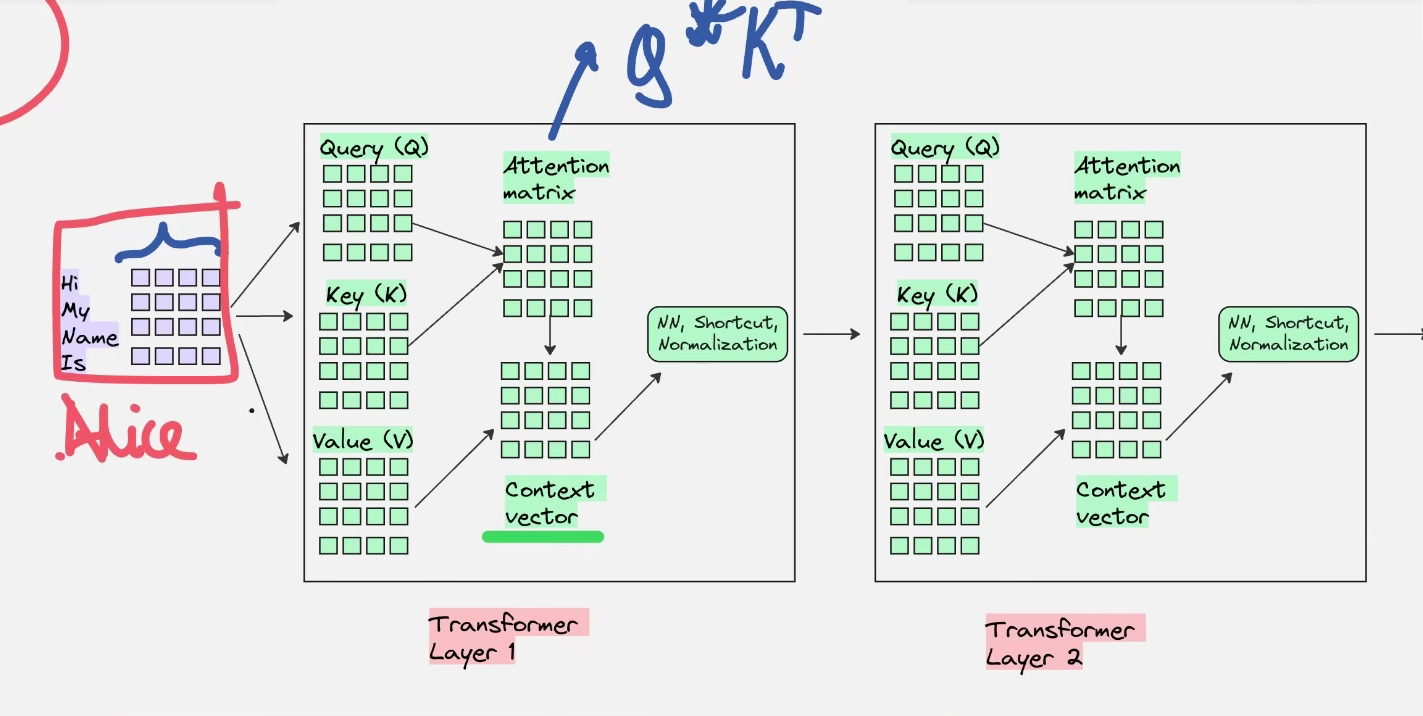

when prompts come into the layers and first time the keys, values, etc generates, this stage is called `Prefill stage` i.e in this stage key and value of prompt is calculated

when the next token generates and again this k-v calculations happens with appending next token with these, its called as `Decoding Stage`.

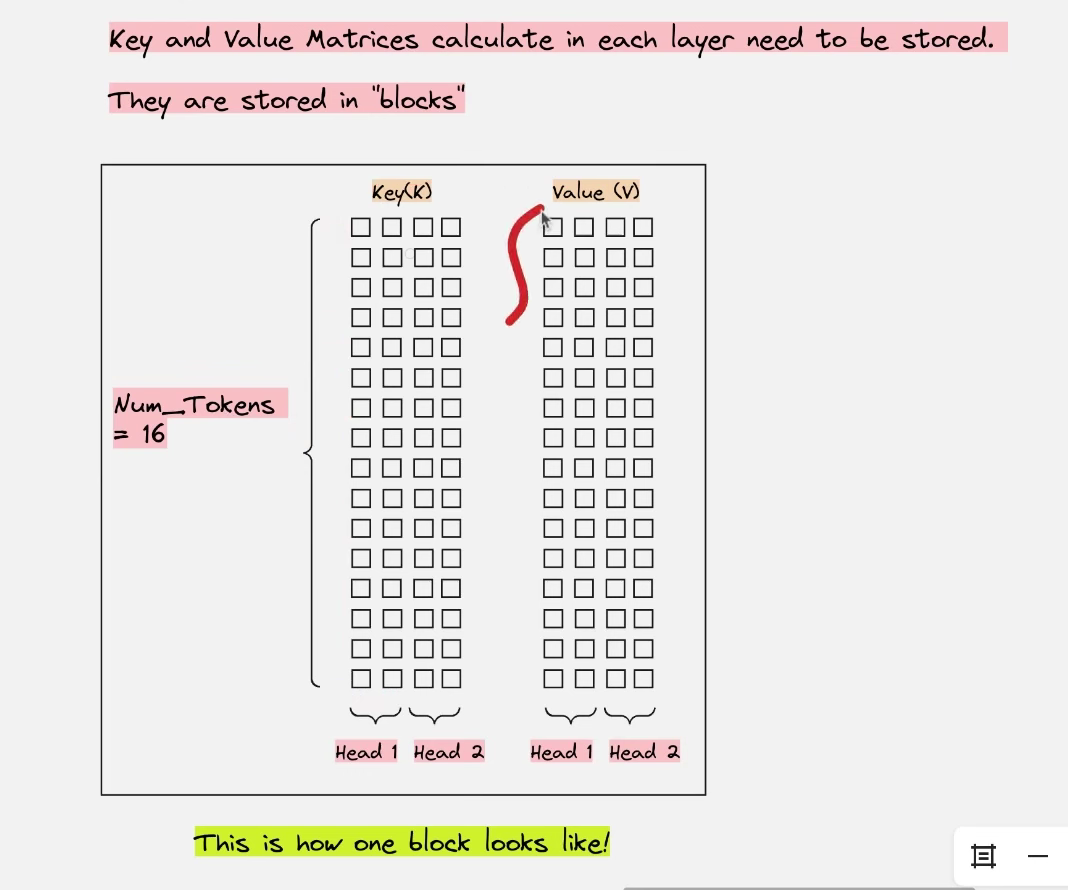

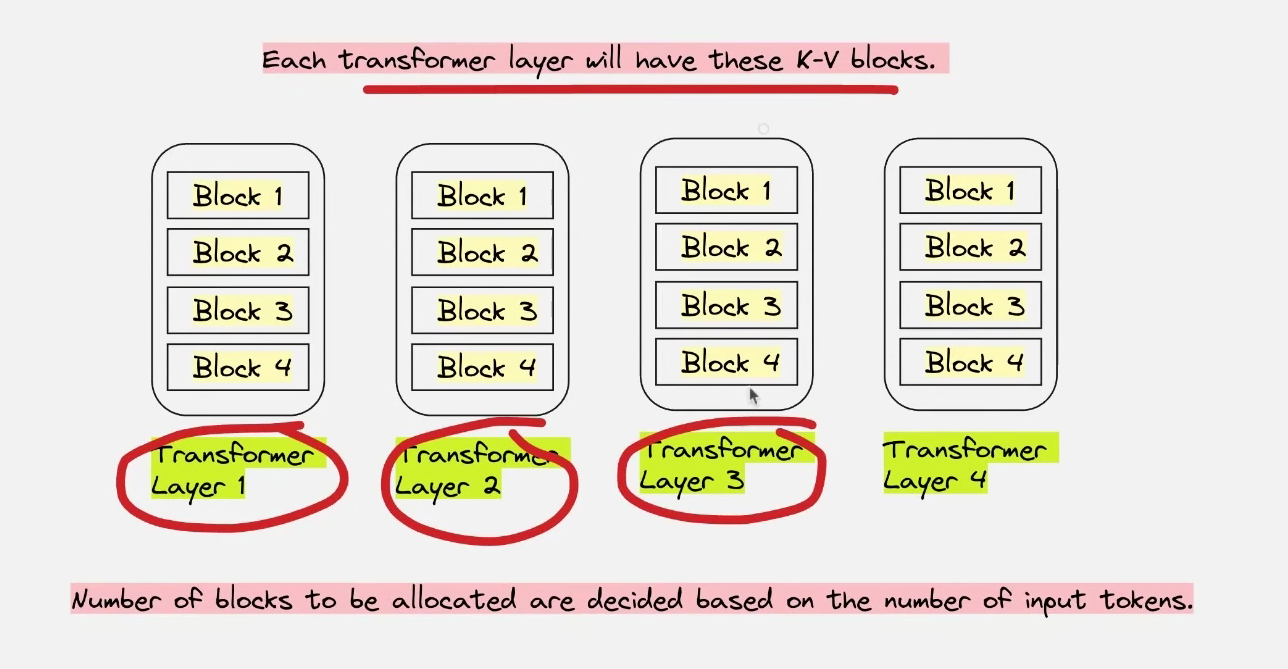

- These blocks are only called cuda blocks - where kv matrices are stored
- each block can store 16 tokens
- if suppose there are 3 prompts (p1,p2,p3) at once, then in block 1 of all layers, kv cache of p1 will be stored and in block 2, kv cache of p2 will be stored, etc.

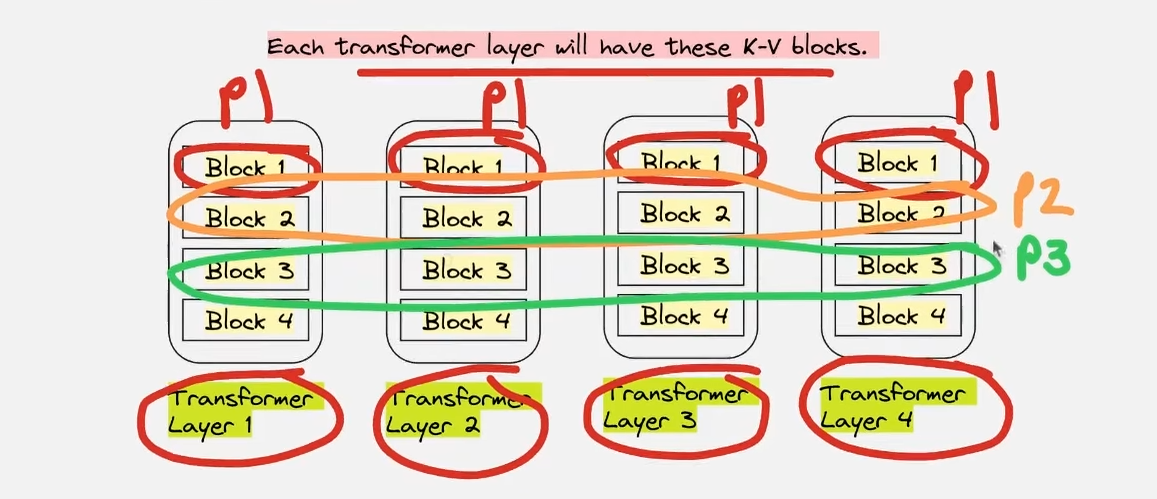

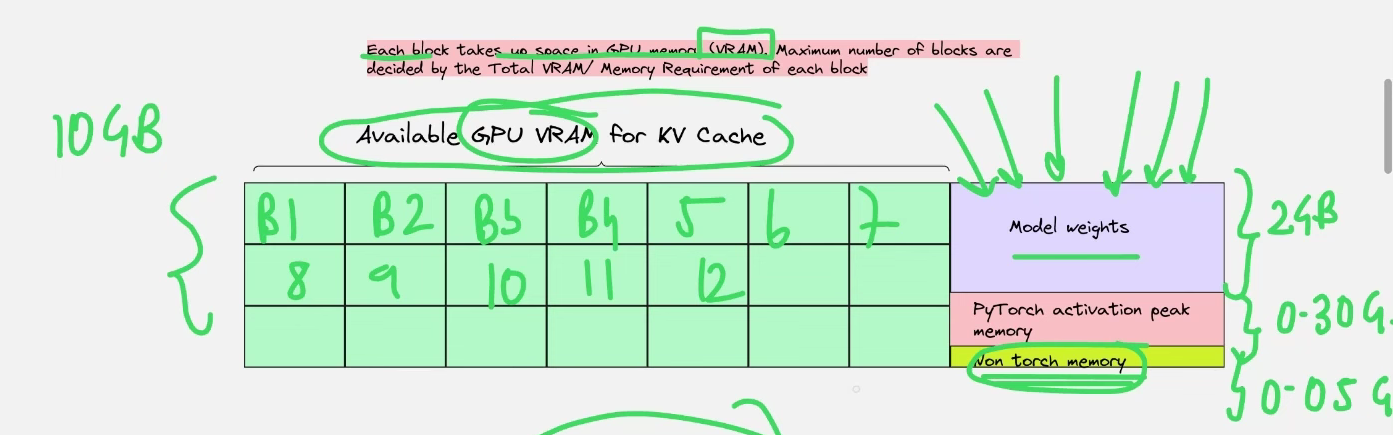

```bash
INFO 09-04 10:57:19 [worker.py:295] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB

INFO 09-04 10:57:19 [worker.py:295] model weights take 2.05GiB,
non_torch_memory takes 0.05GiB, 
PyTorch activation peak memory takes 0.31GiB, 
the rest of the memory reserved for KV Cache is 10.86GiB.

INFO 09-04 10:57:20 [executor_base.py:114] cuda blocks: 32357, CPU blocks: 11915
INFO 09-04 10:57:20 [executor_base.py:119] Maximum concurrency for 2048 tokens per request: 252.79x
```

while calculating the gradients, or during backpropogation, activation states are stored in cpu and then they are offloaded to gpu for calculations and then stored again in cpu. Hence, cpu blocks are also needed.

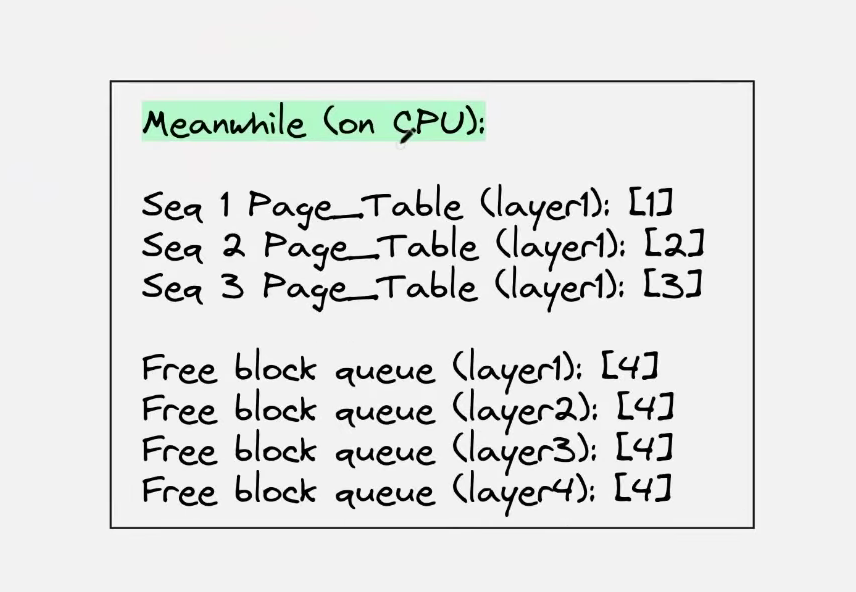

what vllm does is , on cpu, it maintains the page record of which blocks are filled and which not, etc so as to send next prompts to remaining space. this is called `Paged Attention`

If any block reaches end of statement token i.e output end then its block is vacated for other prompt and its added to free block queue so it can be utilised at that instant only.

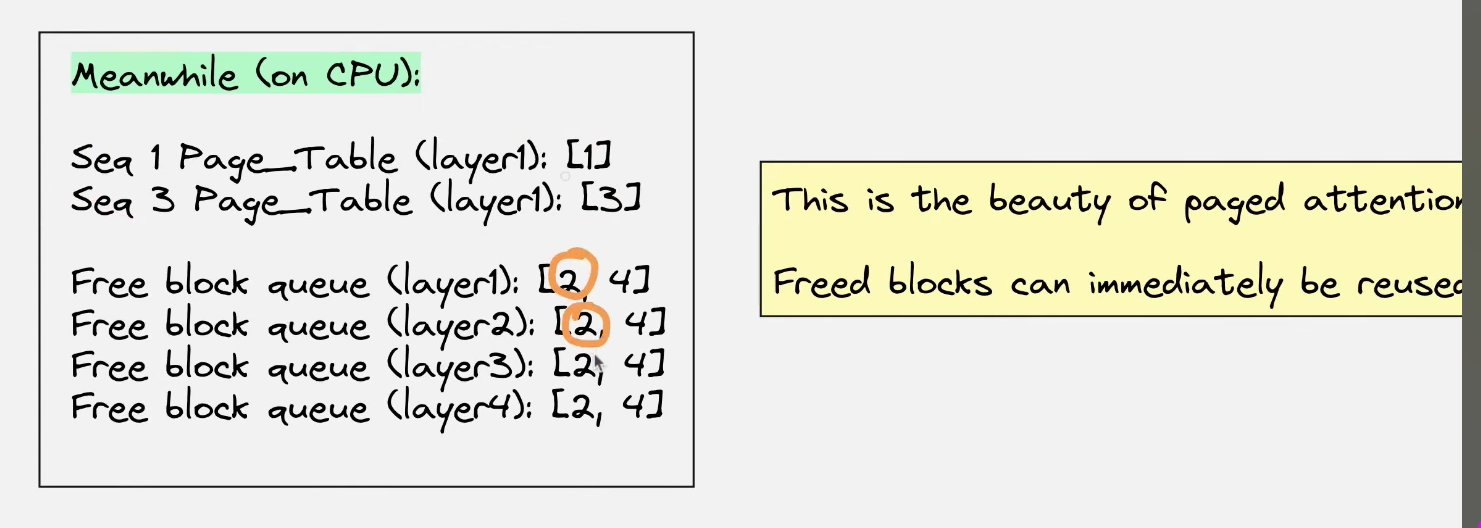

static vs continuous batching

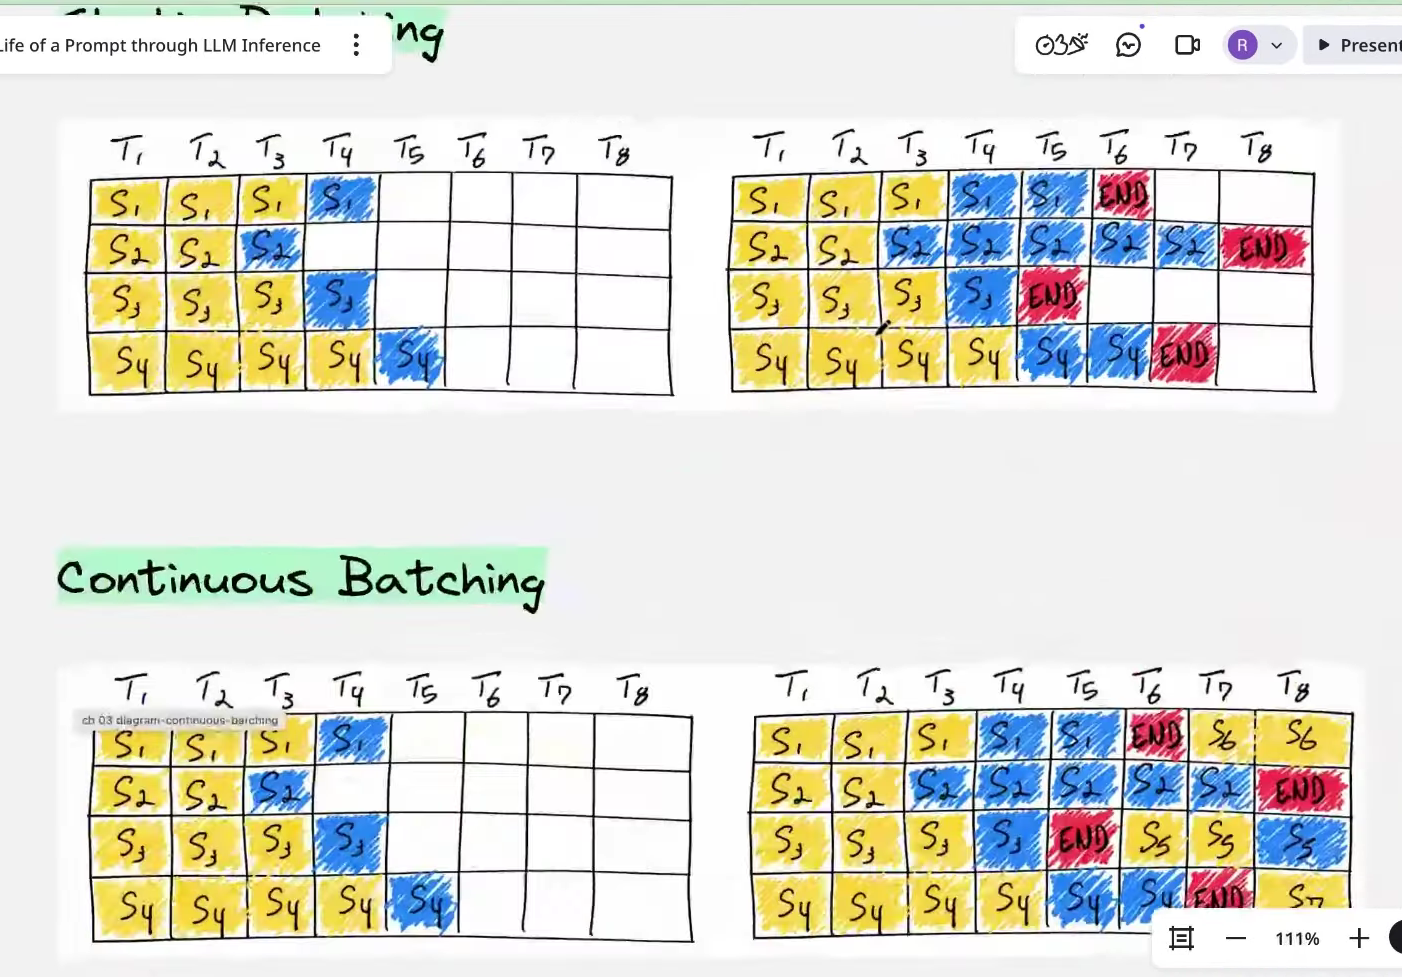

https://www.youtube.com/watch?v=QyHHbeXqgrQ

### one new concept used by sglang, not vllm is radix attention instead of paged attention. hence, sglang is faster.

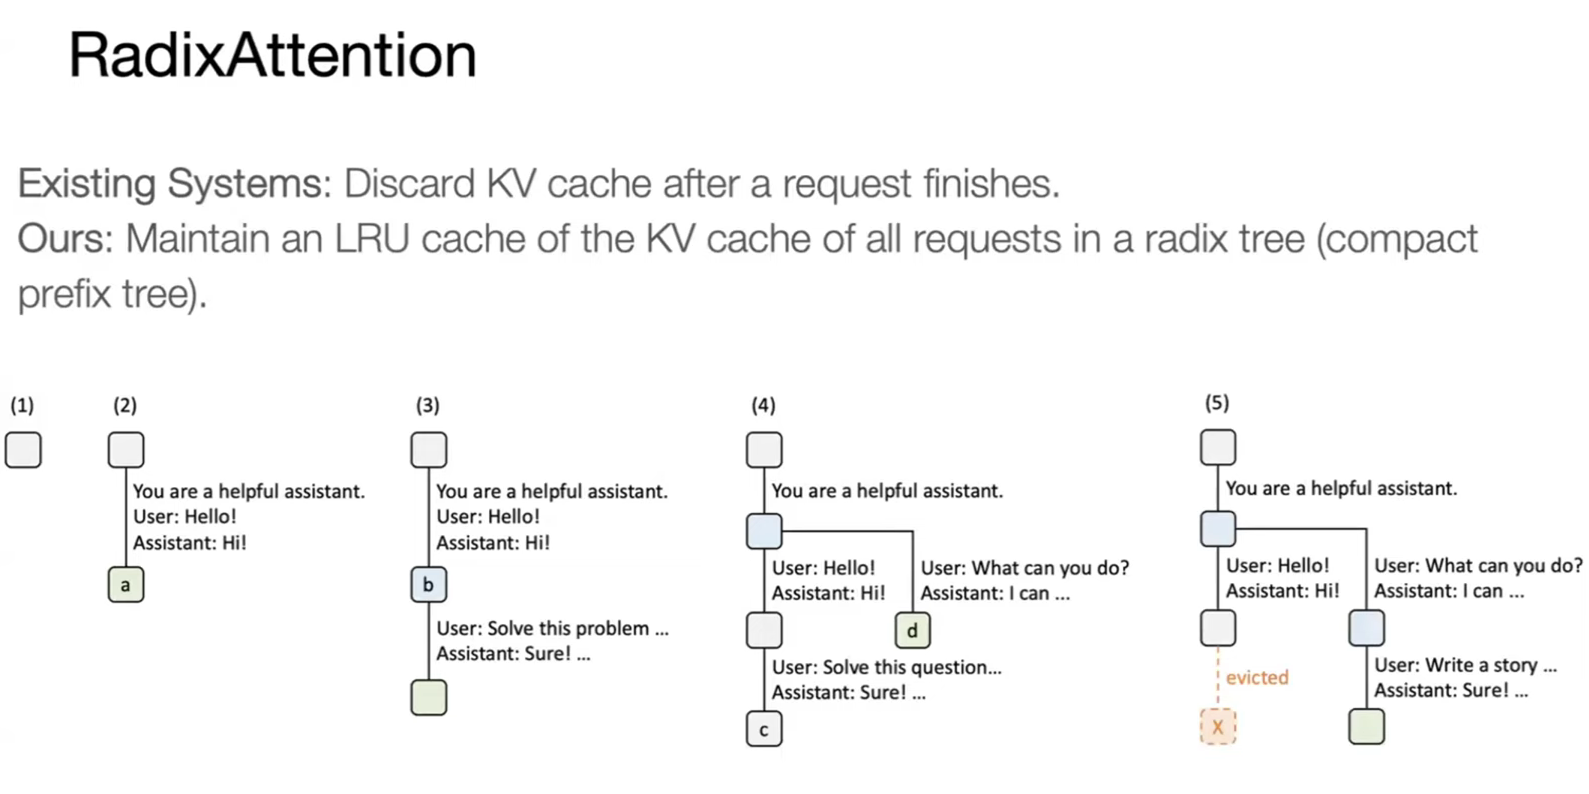

https://www.youtube.com/watch?v=PcvxdWJOyUE

https://www.aleksagordic.com/blog/vllm

https://youtube.com/playlist?list=PLbMP1JcGBmSHxp4-lubU5WYmJ9YgAQcf3&si=nfeyDLXX1Ffjjx7K